# S10T01 - Aprenentage Supervisat - Classificacio
Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.

## - Exercici 1
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

### <font color='blue'>- Loading and cleaning the dataset

In [813]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

#loading the data 
delays = pd.read_csv(r"DelayedFlights.csv")
delays.head(5)

#cleaning the dataframe from NaNs and irrelevant attributes
cols = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
drp = ['Unnamed: 0','FlightNum','TailNum','Year','Cancelled','CancellationCode','Diverted']
delays.drop(columns=drp, inplace=True, axis=1)
delays[cols]= delays[cols].fillna(0)

#converting the target column into binary (0-1)
delays["ArrDelay"] = delays["ArrDelay"].apply(lambda x: 1 if x>0 else 0)

delays.dropna(inplace=True) 

#replacing negative numbers with 0
delays['CRSElapsedTime'][delays['CRSElapsedTime']<0] = 0

delays.drop(columns=cols, inplace=True, axis=1)
print("Shape: ", delays.shape)
print("Total NaN values: ", delays.isna().sum().sum())

pd.set_option('max_columns', None)
delays.head(5)

Shape:  (1928371, 18)
Total NaN values:  0


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,0,8.0,IAD,TPA,810,4.0,8.0
1,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,1,19.0,IAD,TPA,810,5.0,10.0
2,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,1,8.0,IND,BWI,515,3.0,17.0
3,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,1,34.0,IND,BWI,515,3.0,10.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,1,25.0,IND,JAX,688,4.0,10.0


### <font color='blue'> - Dummies

In [790]:
#picking the discrete parameters
cats = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin','Dest']
cats = delays.loc[:, delays.columns.isin(cats)].columns

#converting the numeric columns into str to be able to get their dummy versions
delays[['Month', 'DayofMonth', 'DayOfWeek']] = delays[['Month', 'DayofMonth', 'DayOfWeek']].astype(str)

#dummy creation
dummy = pd.get_dummies(delays[cats])

#concatenate to the main dataset
delays_d = pd.concat([delays,dummy], axis=1)
delays_d.drop(columns=cats, inplace=True, axis=1)
print(delays_d.shape)
delays_d.sample(5, random_state=42)

(1928371, 687)


,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,DayofMonth_1,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_2,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_3,DayofMonth_30,DayofMonth_31,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Orig

### <font color='blue'>- Sampling

In [791]:
delays_d_s = delays_d.sample(1000, random_state=42)    

### <font color='blue'>- Splitting parameters/target  +  train/test

In [792]:
from sklearn.model_selection import train_test_split # Import train_test_split function

#parameters/target
X = delays_d_s.loc[:, delays_d_s.columns != 'ArrDelay']
y = delays_d_s.loc[:, delays_d_s.columns == 'ArrDelay']

#train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### <font color='blue'>- (1/3) DECISION TREE CLASSIFICATION

In [793]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#building the decision tree model
clf = DecisionTreeClassifier()        # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train)       # Train Decision Tree Classifer
dtc_pred = clf.predict(X_test)        # Predict the response for test dataset

### <font color='blue'>- (2/3) K-NEAREST NEIGHBORS (KNN)

In [794]:
#training the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#predicting with the model
knn_pred = classifier.predict(X_test)

### <font color='blue'>- (3/3) LOGISTIC REGRESSION

In [795]:
from sklearn.linear_model import LogisticRegression

#instantiate
logreg = LogisticRegression()
#train model
logreg.fit(X_train,y_train)
#predict with model
log_pred=logreg.predict(X_test)

## - Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

### <font color='blue'>- Accuracy

In [796]:
#accuracy
print("ACCURACY")
print("\tDecision Tree:", round(metrics.accuracy_score(y_test, dtc_pred),2))
print("\tK-Nearest Neighbors:", round(metrics.accuracy_score(y_test, knn_pred),2))
print("\tLogistic Regression:", round(metrics.accuracy_score(y_test, log_pred),2))

ACCURACY
	Decision Tree: 0.87
	K-Nearest Neighbors: 0.87
	Logistic Regression: 0.99


<font color='blue'>Apparently all the models are excelent on predicting the ArrDelay parameter. However there are many reasons to think that all of them are extremely over-fitted due to the dataset be highly imbalanced (almost all the observations have delays). Let's dive a bit deeper by checking the confusion matrices:
    
### <font color='blue'>- Confusion matrix


CONFUSION MATRICES

Decision Tree:


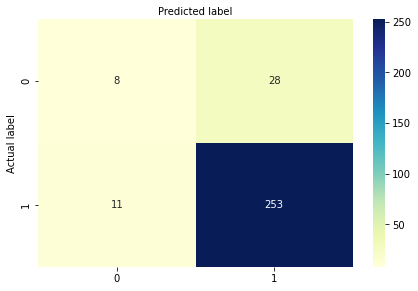


K-Nearest Neighbors:


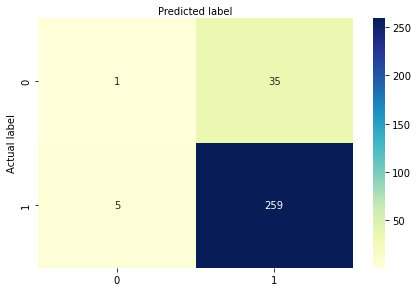


Logistic Regression:


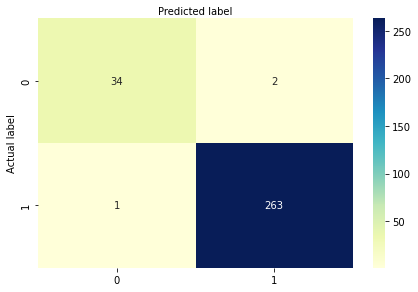

In [797]:
from sklearn.metrics import classification_report, confusion_matrix

#confusion matrix
print("\nCONFUSION MATRICES")
dtc_matrix = confusion_matrix(y_test, dtc_pred)
knn_matrix = confusion_matrix(y_test, knn_pred)
log_matrix = confusion_matrix(y_test, log_pred)

#evaluate model with confusion matrix using heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#heatmap generator function
def matrix_plt(x):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(x), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


# heatmap decision tree
print("\nDecision Tree:")
matrix_plt(dtc_matrix)
# heatmap k-nearest neighbors
print("\nK-Nearest Neighbors:")
matrix_plt(knn_matrix)
# heatmap logistic regression
print("\nLogistic Regression:")
matrix_plt(log_matrix)

<font color='blue'>Definitely the models are good but highly biased by the majority class (1). Nevertheless, let's see if at least the error is minimal:
    
### <font color='blue'>- Precision, sensitivity/recall and specificity:

In [798]:
def delay_metrics(x, y):
    #PRECISION
    print("\tPrecision:\t", round(metrics.precision_score(y_test, y),2))

    #RECALL
    print("\tRecall:\t\t", round(metrics.recall_score(y_test, y),2))

    '''#SPECIFICITY
    specificity = x[0][0] / (x[0][0] + x[0][1])
    print("\tSpecificity:\t", round(specificity,2))'''

print("\nDecision Tree:")
delay_metrics(dtc_matrix, dtc_pred)

print("\nK-Nearest Neighbors:")
delay_metrics(knn_matrix, knn_pred)

print("\nLogistic Regression:")
delay_metrics(log_matrix, log_pred)


Decision Tree:
	Precision:	 0.9
	Recall:		 0.96

K-Nearest Neighbors:
	Precision:	 0.88
	Recall:		 0.98

Logistic Regression:
	Precision:	 0.99
	Recall:		 1.0


<font color='blue'>Looks like all the <b>predictors are close to the actuals</b> according to Precision and Recall. Between this two, and given the situation, <b>we should aim to improve the Recall at the expense of Precision</b>. In other words, we want to detect as many as delayed flights as possible, even if we predict false positives. This way we'll be ready for the majority of delays that can happen, before they do. <br><br>Nevertheless, these metrics are not really useful as we can still suspect that they are highly over-fitted. Until we don't work around feature engineering we cannot be certain about their value.

## - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.<br><br>
<font color='blue'> We'll start by the Decision Tree Classifier. Here we can play with the 'min_impurity_decrease', 'criterion' option and the 'max_depth'. 
    
### <font color='blue'>- Decision Tree Classifier
<br>    
<font color='blue'><b>'min_impurity_decrease'</b> has 0 by default. This means the predictor won't stop creating new nodes until the impurity is 0 (all remaining observations are from the same class). This may be leading the predictor to over-fitting, so by increasing this hyperparameter the over-fit should reduce, but also will the tree size.<br>
The second hyperparamter we'll harness is <b>'max_depth'</b> which will help us reducing the tree size even further, making the predictor less over-fitted.

In [799]:
print("\nDECISION TREE:")
print("\n    Original predictor:")
delay_metrics(dtc_matrix, dtc_pred)

#changing 'criterion', 'min_impurity_decrease', and 'max_depth'
clf = DecisionTreeClassifier(min_impurity_decrease=0.1, 
                             max_depth=2, criterion='entropy')          # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train)                                         # Train Decision Tree Classifer
dtc_pred = clf.predict(X_test)                                          # Predict the response for test dataset

print("\n    After tuning hyperparameters:")
delay_metrics(dtc_matrix, dtc_pred)


DECISION TREE:

    Original predictor:
	Precision:	 0.9
	Recall:		 0.96

    After tuning hyperparameters:
	Precision:	 0.88
	Recall:		 1.0


<font color='blue'>Apparently it helped to reduce Precision and increase the Recall, exactly what we wanted for this exercise. However, it doesn't look like the predictor is less over-fitted. This won't probably reduce until we apply some feature engineering later. <br><br> Let's move on to the K-Nearest Neighbors predictor and its hyperparameters:
    
### <font color='blue'>- K-Nearest Neighbors (KNN)
<font color='blue'>The most interesting hyperparamter here is the number of k-neighbors to choose. There's no standard number of K to use as a rule. Choosing a lower K value can drive our model to be too generalistic, while choosing a high K can over-fit our model. We'll use a plot to see what 's the optimal value of K in our case:

Text(0, 0.5, 'Mean Error')

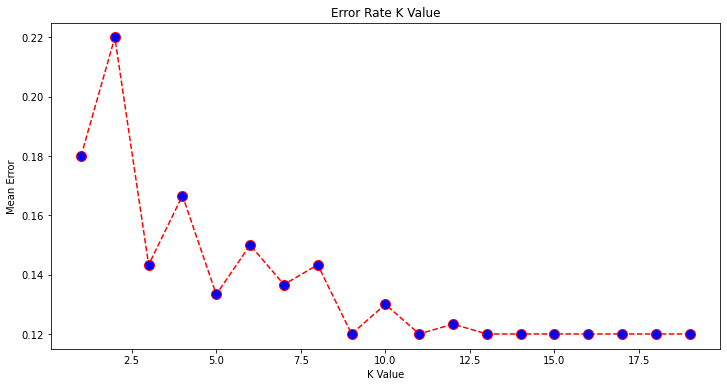

In [800]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(len(pred_i),1)
    error.append(np.mean(pred_i != y_test))

# plotting results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

<font color='blue'>The result is showing that if we want to minimize the mean_error in our predictions, we should choose a K value of 9. That's what we'll do to proceed:

In [801]:
print("\nK-NEAREST NEIGHBORS:")
print("\n    Original predictor:")
delay_metrics(knn_matrix, knn_pred)

#changing the value of K from 5 to 9
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

#predicting with the model
knn_pred = classifier.predict(X_test)

print("\K-NEAREST NEIGHBORS:")
print("\n    After tuning hyperparameters:")
delay_metrics(knn_matrix, knn_pred)


K-NEAREST NEIGHBORS:

    Original predictor:
	Precision:	 0.88
	Recall:		 0.98
\K-NEAREST NEIGHBORS:

    After tuning hyperparameters:
	Precision:	 0.88
	Recall:		 1.0


<font color='blue'>We can see how the K value set to 9 is making the model more accurate in terms of Recall, as expected. This is driving the precision down but as we saw before that's okay for this situation. The model is predicting 99% of the times there's actually gonna be a ArrDelay, which is ideal. However, we continue to see that the model is probably over-fitted.
    
### <font color='blue'>- Logistic Regression
    
<font color='blue'>Logistic regression does not really have any critical hyperparameters to tune. Sometimes, we can see useful differences in performance or convergence with different <b>solvers</b>. Regularization (<b>penalty</b>) can sometimes be helpful. And the <b>C parameter</b> controls the penality strength, which can also be effective.

In [802]:
print("\nLOGISTIC REGRESSION:")
print("\n    Original predictor:")
delay_metrics(log_matrix, log_pred)

#changing 'C', 'penalty' and 'solver'
elasticnetlogreg = LogisticRegression(C=1000, penalty='l1', solver='none')
#train model
logreg.fit(X_train,y_train)
#predict with model
log_pred=logreg.predict(X_test)


print("\nLOGISTIC REGRESSION:")
print("\n    After tuning hyperparameters:")
delay_metrics(log_matrix, log_pred)


LOGISTIC REGRESSION:

    Original predictor:
	Precision:	 0.99
	Recall:		 1.0

LOGISTIC REGRESSION:

    After tuning hyperparameters:
	Precision:	 0.99
	Recall:		 1.0


<font color='blue'>The Logistic Regression model was already maxed out in terms of Precision and Recall, so we can't see a big difference after tuning hyperparameters. We have reasons to think that this model is extremely over-fitted. In general, we've seen how we need other techniques such as cross-validation and feature engineering before training the models to get more realistic results. 
## - Exercici 4 
Compara el seu rendiment utilitzant l’aproximació train/test o cross-validation.<br><br>
<font color='blue'>The results we've calculated so far all followed the train/test method, so let's see if we get different results after applying cross-validation to the predictors (i.e. we'll expect less over-fitted results).

In [803]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
scoring = ['precision_macro', 'recall_macro']       #listing all the evaluation methods we want

def CV_models(model, matrix, pred):
    #original results
    print("\n", model, "\n----------------------")
    print("\n    Original predictor:")
    delay_metrics(matrix, pred)

    #building model 
    clf = model
    #applying cross-validation
    scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
    
    p = round(scores['test_precision_macro'].mean(), 2)
    r = round(scores['test_recall_macro'].mean(), 2)
    
    #results
    print("\n    After cross-validation:")
    print("\tPrecision:\t", p)
    print("\tRecall:\t\t", r)
    
    return p, r

dtc_p, dtc_r = CV_models(DecisionTreeClassifier(), dtc_matrix, dtc_pred)
knn_p, knn_r = CV_models(KNeighborsClassifier(), knn_matrix, knn_pred)
log_p, log_r = CV_models(LogisticRegression(), log_matrix, log_pred)


 DecisionTreeClassifier() 
----------------------

    Original predictor:
	Precision:	 0.88
	Recall:		 1.0

    After cross-validation:
	Precision:	 0.71
	Recall:		 0.69

 KNeighborsClassifier() 
----------------------

    Original predictor:
	Precision:	 0.88
	Recall:		 1.0

    After cross-validation:
	Precision:	 0.69
	Recall:		 0.53

 LogisticRegression() 
----------------------

    Original predictor:
	Precision:	 0.99
	Recall:		 1.0

    After cross-validation:
	Precision:	 0.96
	Recall:		 0.96


<font color='blue'>In all cases, cross-validation has brought about much less over-fitted results. However, the predictions are still highly accurate, which is good for us. <b>KNN classifier</b> is the one most affected by CV, since it reduced the accuracy  by 20%. <b>Decision Tree classifier</b> reduced a bit but it's still near 70%. And <b>Logistic Regression classifier</b> must be a very good model cause even with cross-validation it still excels in predicting values (96% recall).
    
## - Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.

<font color='blue'>Let's go back to the beginning and work out a bit our original data. We'll standarize and apply PCA to reduce dimensionality.

### <font color='blue'> - Standarization

In [804]:
#recovering dataset clean from the beginning 

#keeping out the target and dummies
X_1 = delays_d_s.iloc[:,:12]
d = delays_d_s.loc[:, delays_d_s.columns == 'DepDelay']
d.reset_index(drop=True, inplace=True)
X_1 = X_1.loc[:, ~X_1.columns.isin(['ArrDelay','DepDelay'])]
y = delays_d_s.loc[:, delays_d_s.columns == 'ArrDelay']
X_2 = delays_d_s.iloc[:,12:]

#standarizing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_1_std = ss.fit_transform(X_1)
X_1[X_1.columns] = X_1_std

#reuniting the independent variables
X = pd.concat([X_1, X_2], axis=1)

display(X.head(5))

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,DayofMonth_1,DayofMonth_10,DayofMonth_11,DayofMonth_12,DayofMonth_13,DayofMonth_14,DayofMonth_15,DayofMonth_16,DayofMonth_17,DayofMonth_18,DayofMonth_19,DayofMonth_2,DayofMonth_20,DayofMonth_21,DayofMonth_22,DayofMonth_23,DayofMonth_24,DayofMonth_25,DayofMonth_26,DayofMonth_27,DayofMonth_28,DayofMonth_29,DayofMonth_3,DayofMonth_30,DayofMonth_31,DayofMonth_4,DayofMonth_5,DayofMonth_6,DayofMonth_7,DayofMonth_8,DayofMonth_9,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,

### <font color='blue'> - PCA

Text(91, 0.22, 'V')

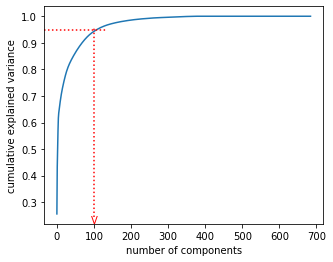

In [805]:
#applying PCA
from sklearn.decomposition import PCA

plt.figure(figsize=(5,4))
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.95, 0 ,0.22, ls=':', c='red')    # minimum variance
plt.axvline(101, 0.03 ,0.90, ls=':', c='red')    # minimum variance
plt.annotate("V", xy=(91,0.22), color='red')

<font color='blue'>Apparently by keeping the 100 most important attributes we should still be working with 95% of the variance available in the dataset, so let's go on and reduce the dimensionality of our dataset.

In [806]:
pca = PCA(.95)
pca.fit(X)

#applying pca
principalComponents = pca.transform(X)
new_cols = []
for i in range(pca.n_components_ ):
    i+=1
    new_cols.append("PC"+str(i))
X = pd.DataFrame(data = principalComponents)#, columns = new_cols)
X['DepDelay'] = d

print(X.shape)
X.head(5)

(1000, 110)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,DepDelay
0,-2.126227,1.721793,-0.517362,-0.276602,0.021449,0.087391,0.455864,0.036509,0.179928,0.279631,0.446962,-0.424446,0.183924,0.697658,-0.255738,-0.284589,0.792013,0.561078,0.223976,0.160615,-0.093244,0.135599,-0.001930,0.272044,0.050611,-0.014786,0.015440,-0.045702,-0.103193,-0.052780,0.086681,0.097967,-0.084810,0.144121,0.031688,-0.095585,0.051893,0.009695,-0.269791,0.126639,-0.012203,-0.056690,0.453048,-0.047123,-0.315337,0.111638,-0.308238,0.036172,0.225465,0.161599,-0.055752,0.132603,0.185447,-0.253703,0.166847,0.256876,0.039305,-0.009216,0.276979,0.174929,0.043191,-0.011646,-0.116172,-0.057534,-0.181757,-0.106057,-0.036849,-0.076598,0.018984,0.033865,-0.116680,-0.084524,-0.078393,-0.141038,-0.067623,-0.001931,-0.119321,0.046980,0.136041,0.122277,-0.121272,-0.013819,0.094894,0.055298,0.088460,-0.030074,0.023329,0.045779,-0.073603,0.011312,-0.095595,-0.111325,-0.055865,0.833254,-0.092982,0.164345,-0.325651,-0.250035,0.116949,-0.060462,-0.010938,-0.184194,0.026840,0.041406,0.036304,-0.059881,-0.101418,0.048602,0.025412,9.0
1,1.167396,1.043776,0.252309,-0.124758,-0.573325,0.254656,-0.398554,-0.043835,-0.439951,-0.160305,0.039163,-0.221331,0.692286,-0.107630,-0.582746,0.972297,0.302418,-0.594227,-0.107711,-0.125966,0.309915,0.514661,-0.264335,0.079162,-0.111950,-0.156974,0.060230,-0.271835,-0.011813,-0.251265,-0.033915,-0.003184,0.358090,0.236579,0.291053,0.107356,0.303319,0.236127,0.423014,0.273176,-0.006329,-0.270374,-0.058921,0.261840,0.241443,-0.277389,0.035957,-0.097116,-0.014579,0.074855,-0.233248,0.015166,-0.117342,-0.117738,0.115060,-0.047920,-0.055840,0.028976,0.135459,0.045406,0.042071,-0.056247,-0.102569,0.071021,0.075651,-0.255923,-0.038625,-0.061324,-0.064021,-0.133249,-0.038945,0.036320,-0.109645,-0.045588,-0.087793,0.029307,0.061644,0.043725,-0.065895,0.040983,-0.117555,0.016303,0.019977,-0.130867,-0.052219,-0.072575,-0.032134,0.062750,-0.014443,0.074086,-0.013640,0.013389,-0.041242,0.019250,0.118711,0.114324,0.063944,-0.040217,0.014740,-0.056910,-0.091367,-0.000942,-0.005275,0.025742,0.014206,-0.091329,0.079436,0.074254,0.067719,22.0
2,-0.965656,1.194140,0.087511,-0.329260,0.032122,-0.062031,-0.286367,-0.096605,0.227923,-0.052061,0.017229,0.037935,0.895614,-0.556945,0.578478,0.317456,-0.107693,0.173192,0.295656,-0.495362,0.335515,-0.348385,-0.345793,0.163862,0.230616,0.165847,0.346537,-0.169971,-0.002901,-0.111525,0.167590,-0.445035,0.141978,-0.155099,-0.025015,-0.360661,0.212093,-0.495620,0.263044,0.100960,-0.000779,-0.086883,-0.003024,-0.271399,-0.271058,0.008438,-0.155993,-0.212781,0.146211,0.107008,-0.019614,-0.314584,-0.051736,-0.054813,-0.228946,-0.099948,0.052583,-0.042002,0.175565,0.050156,0.000170,-0.139433,0.002629,0.118769,0.144281,-0.081314,0.023573,-0.190358,0.328673,-0.163292,-0.122032,0.254703,0.041523,-0.104344,0.000778,0.243228,-0.325489,0.314460,0.114238,0.046646,0.092319,-0.018995,-0.158143,0.006150,-0.128594,-0.020862,0.026077,0.068030,-0.055363,-0.047790,0.138553,0.048955,-0.010280,-0.012275,-0.113077,-0.047157,-0.004008,-0.054260,0.091954,0.038497,-0.012713,-0.061164,-0.020536,0.050588,0.011404,-0.009045,0.024175,-0.020705,-0.062272,16.0
3,-0.473785,-1.994735,-0.371980,0.584605,-0.368042,-0.120368,0.416405,0.024287,-0.016424,0.755684,0.493793,-0.009642,-0.301620,-0.077245,-0.127891,0.289791,-0.537893,0.539983,-0.431435,-0.113828,-0.475004,0.252620,-0.083529,-0.053711,-0.038183,-0.091863,-0.019038,0.027567,0.049968,0.088588,-0.088948,-0.222197,0.028832,-0.024227,0.237861,-0.012016,0.177695,0.090829,0.226345,-0.132207,0.492897,0.044394,-0.231492,-0.315224,-0.168936,-0.130461,0.442375,0.074544,0.057572,-0.117221,0.060330,0.030584,0.705834,-0.139385,0.236025,0.07768

<font color='blue'>Now the dataset is remarkably leaner and more fitted to work with predictors.

### <font color='blue'> - Imbalanced data?
<font color='blue'> The last thing we want to check is how much the target variable is imabalanced, or if it is:

(1928371, 18)


<AxesSubplot:xlabel='ArrDelay', ylabel='count'>

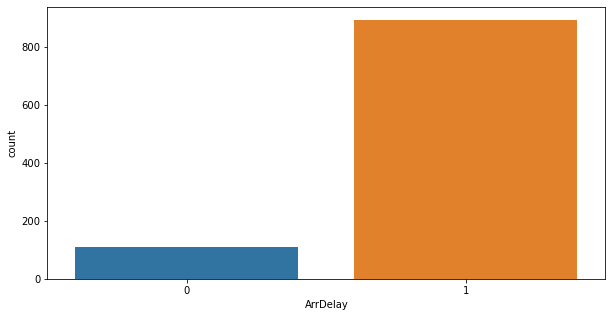

In [807]:
print(delays.shape)
plt.figure(figsize = (10,5))
sns.countplot(data=y, x='ArrDelay')

<font color='blue'>As we suspected, the dataset is extremely imbalanced. This is because the data was gathered to monitor the flights with delays, so probably it's the result of an study focused on the delays. We'll need to bring about balance to the dataset to improve the predictors' performance.<br><br>First we'll have to joint the features with the target columns, then we'll apply SMOTE to oversample the minority class (0), and finally we'll apply undersampling to the majority class to avoid ending up with a bigger dataset than the original one.

(1561, 111)


<AxesSubplot:xlabel='ArrDelay', ylabel='count'>

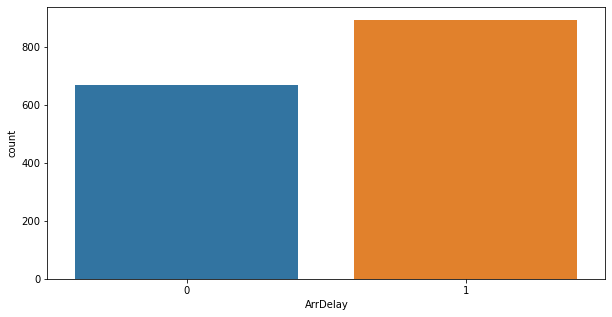

In [808]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.75)                 #oversampling of the minority class (50% of the majority class)
under = RandomUnderSampler(sampling_strategy=0.75)   #undersampling majority class (50% of the majorty class length)
steps = [('o', over), ('u', under)] 
pipeline = Pipeline(steps=steps)                     #merging both processes into one pipeline to make it simpler

# transform the dataset
X, y = pipeline.fit_resample(X, y)

y.reset_index(drop=True, inplace=True)
delays = pd.concat([X, y], axis=1)
print(delays.shape)

plt.figure(figsize = (10,5))
sns.countplot(data=y, x='ArrDelay')

<font color='blue'>Now the dataset is much more balanced and lean than before. Let's see how the predictors perform compared to before.

### <font color='blue'>- Reassessing predictors after feature engineering

In [809]:
def CV_models(model, p, r):
    #original results
    print("\n", model, "\n----------------------")
    print("\n    Original predictor:")
    print('\tPrecision:\t', p, '\n\tRecall:\t\t', r)

    #building model 
    clf = model
    #applying cross-validation
    scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
    
    p = round(scores['test_precision_macro'].mean(),2)
    r = round(scores['test_recall_macro'].mean(), 2)
    
    #results
    print("\n    After feature engineering:")
    print("\tPrecision:\t", p)
    print("\tRecall:\t\t", r)
    
    return p, r

dtc_p, dtc_r = CV_models(DecisionTreeClassifier(), dtc_p, dtc_r)
knn_p, knn_r = CV_models(KNeighborsClassifier(), knn_p, knn_r)
log_p, log_r = CV_models(LogisticRegression(), log_p, log_r)


 DecisionTreeClassifier() 
----------------------

    Original predictor:
	Precision:	 0.71 
	Recall:		 0.69

    After feature engineering:
	Precision:	 0.9
	Recall:		 0.91

 KNeighborsClassifier() 
----------------------

    Original predictor:
	Precision:	 0.69 
	Recall:		 0.53

    After feature engineering:
	Precision:	 0.87
	Recall:		 0.87

 LogisticRegression() 
----------------------

    Original predictor:
	Precision:	 0.96 
	Recall:		 0.96

    After feature engineering:
	Precision:	 0.94
	Recall:		 0.95


<font color='blue'>After balancing out the dataset and running the predictors, the results are much more promising. Now it seems the predictions are much higher in accuracy and are all closer to 100%. Even the Logistic Regression Classifier that was extremely over-fitted now it has reduced some points implying that it's now more flexible thanks to the balanced data. All in all, we can now be confident with these predictors, considering the tough feature engineering that we've put our dataset under. Last but not least, it's worth to highlight that the best predictor in terms of <b>recall</b> is <b>Logistic Regression</b> with a 95%, followed by <b>Decision Tree</b> with a 91%, closing with <b>K-Nearest Neighbors</b> that performed an acceptable 87%.

## - Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions.<br>
<br><font color='blue'>We can erase the attribute 'DepDelay' which presumably will have a huge impact on the predictors' performance. Let's confirm if this variable is indeed highly correlated with the target variable 'ArrDelay':

In [810]:
delays.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,DepDelay,ArrDelay
0,0.404897,2.878162,-1.021026,-0.158604,-0.666388,0.164822,0.238056,-0.146920,-0.071871,-0.251208,1.071718,-0.257149,-0.624345,-0.095161,0.048525,-0.048453,-0.031781,-0.376615,0.638735,0.007052,-0.369116,-0.272752,-0.152576,-0.134926,0.202869,-0.025989,-0.077721,0.023244,-0.184701,-0.094822,0.011848,0.053287,-0.083152,-0.028746,-0.086941,-0.007779,-0.138859,-0.021401,-0.039038,0.099523,0.070664,-0.019947,-0.282756,0.012030,-0.065008,0.018661,0.015093,-0.058173,-0.135055,-0.003488,0.009391,0.074005,0.101358,0.198953,0.100997,-0.351370,0.082514,0.037311,0.452222,-0.151104,0.112930,-0.528451,0.017757,0.013560,-0.017911,-0.023758,-0.129240,-0.229538,-0.193516,0.195698,-0.033853,-0.045376,-0.156989,-0.041310,-0.073052,0.004260,0.024546,-0.103693,-0.122588,0.006241,-0.099097,-0.006294,0.086224,-0.038106,0.111504,0.082119,-0.078394,-0.244307,-0.071561,0.128593,0.032777,-0.195388,0.077380,-0.015517,0.018936,-0.098563,0.084637,0.026019,-0.086471,-0.211935,-0.143595,0.052851,0.293640,-0.025607,0.170725,-0.020308,0.257323,-0.216976,0.090439,7.0,0
1,0.228421,0.180878,-0.634565,-0.573927,-0.456669,0.171757,-0.509000,-0.214360,-0.177274,-0.494159,0.345652,-0.127555,-0.271574,-0.375518,0.008442,-0.734957,0.627634,0.355586,0.000007,0.032367,-0.227090,-0.076316,-0.165278,0.499538,-0.462850,-0.165800,-0.476357,0.200990,-0.016051,-0.250124,0.108065,0.011268,0.187872,0.128461,0.092121,0.012918,-0.049465,-0.102210,0.257256,-0.127053,-0.122427,0.325420,-0.344235,0.094802,-0.145559,-0.065840,-0.064938,-0.059821,-0.116211,0.562255,-0.278756,0.061788,-0.030879,0.127971,-0.361812,0.307840,0.059869,-0.016374,-0.138500,-0.096974,-0.089847,-0.003503,-0.009655,0.280705,-0.383901,0.278457,0.015450,-0.194087,-0.086428,0.027111,-0.064214,-0.089260,0.001788,0.053300,-0.059867,-0.136508,0.033205,-0.131663,0.020347,-0.016662,0.005106,0.263148,0.099283,-0.140710,-0.046161,0.227629,0.110466,0.102797,-0.020526,0.022904,0.097733,-0.067587,0.191063,0.011576,-0.000555,-0.082306,-0.106480,-0.020781,-0.050826,-0.112115,-0.129292,0.070808,-0.167664,-0.022096,-0.016327,0.068823,0.016145,0.010903,-0.044763,9.0,0
2,3.113415,2.153240,0.339422,0.968296,-0.830644,0.022871,0.528590,-0.448858,-0.508747,-0.004175,-0.583741,0.084096,0.106466,-0.230188,-0.118406,-0.183164,-0.190599,-0.142928,0.267146,0.689632,-0.111329,0.618370,-0.497263,0.275797,0.157390,0.424841,-0.083393,-0.170320,0.263533,0.154432,-0.010581,-0.245375,0.180214,0.290160,0.068431,-0.031251,-0.128566,0.116795,0.247393,-0.218883,0.391843,0.410981,-0.518972,-0.066861,0.180547,-0.049000,0.147696,-0.002296,0.039740,0.359032,-0.130047,0.134640,0.227815,-0.092308,-0.174950,0.022074,0.180326,-0.108971,-0.153533,0.133343,0.171906,-0.022726,-0.051027,-0.057685,-0.149406,-0.041912,0.079431,0.015485,-0.267868,-0.223515,-0.110069,0.052630,0.020220,-0.074055,-0.297239,-0.024772,0.135628,0.066007,0.348030,0.531138,0.035839,0.381398,-0.169474,-0.315491,0.074943,0.071963,0.035663,-0.077267,-0.139788,0.166767,0.244580,-0.112870,-0.157672,0.058112,0.049158,0.034461,-0.050969,-0.009492,-0.025563,0.032477,0.073847,-0.016551,-0.070891,-0.013453,-0.114298,0.065593,0.069020,0.047231,0.004672,6.0,0
3,2.565753,1.614262,-0.840708,-0.863886,-0.964700,0.393057,0.293544,0.021542,0.123524,0.909790,0.666859,-0.167255,-0.013559,-0.097806,0.903898,0.295399,-0.055702,0.198695,-0.142728,0.112634,-0.214318,0.088649,-0.046911,0.146000,0.028934,-0.052568,-0.005752,0.039202,-0.006090,-0.126755,0.166860,-0.021961,0.120923,0.066170,0.042735,0.000436,0.085140,-0.039482,-0.009967,0.322632,0.046542,-0.045594,0.021464,-0.006514,-0.253470,0.307069,0.399177,0.023152,0.267649,-0.012896,0.156120,-0.088921,-0.099609,-0.089875

<AxesSubplot:xlabel='DepDelay', ylabel='ArrDelay'>

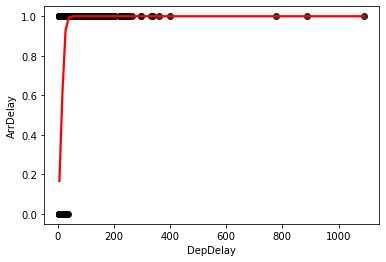

In [811]:
sns.regplot(data=delays, x='DepDelay', y='ArrDelay', logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

<font color='blue'>In this logistic regression plot we can see how as soon as there's DepDelay the ArrDelay becomes 1 (true), indicating that DepDelay is one of the strongest features for the ArrDelay value. Let's see what happens with the predictors when we delete this attribute from the dataset.

In [812]:
X = delays.loc[:, ~delays.columns.isin(['ArrDelay','DepDelay'])]
y = delays.loc[:, delays.columns == 'ArrDelay']

def CV_models(model, p, r):
    #original results
    print("\n", model, "\n----------------------")
    print("\n    Original predictor:")
    print('\tPrecision:\t', p, '\n\tRecall:\t\t', r)

    #building model 
    clf = model
    #applying cross-validation
    scores = cross_validate(clf, X, y, cv=5, scoring=scoring)
    
    p = round(scores['test_precision_macro'].mean(),2)
    r = round(scores['test_recall_macro'].mean(), 2)
    
    #results
    print("\n    After feature engineering:")
    print("\tPrecision:\t", p)
    print("\tRecall:\t\t", r)

CV_models(DecisionTreeClassifier(), dtc_p, dtc_r)
CV_models(KNeighborsClassifier(), knn_p, knn_r)
CV_models(LogisticRegression(), log_p, log_r)


 DecisionTreeClassifier() 
----------------------

    Original predictor:
	Precision:	 0.9 
	Recall:		 0.91

    After feature engineering:
	Precision:	 0.85
	Recall:		 0.86

 KNeighborsClassifier() 
----------------------

    Original predictor:
	Precision:	 0.87 
	Recall:		 0.87

    After feature engineering:
	Precision:	 0.78
	Recall:		 0.72

 LogisticRegression() 
----------------------

    Original predictor:
	Precision:	 0.94 
	Recall:		 0.95

    After feature engineering:
	Precision:	 0.84
	Recall:		 0.84


<font color='blue'>Effectively, as expected the predictors reduced by 5-6% as we lost the DepDelay attribute, implying that this feature is very important in predicting the target variable.